In [1]:
# import libraries

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
movies=pd.read_csv("../input/rating/ratings_small.csv")


In [3]:
# observe the head of the dataset
movies.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


in this dataset, the variable `timestamp` is not helpful to build this recommendation system, so we can delete this variable from our dataset

In [4]:
movies.shape

(100004, 4)

In [5]:
# remove the variable timestamp from the dataset
movies=movies.drop(['timestamp'],axis=1)


In [6]:
# see the shape of the dataset

movies.shape

(100004, 3)

In [7]:
# check for missing values
movies.isnull().sum()


userId     0
movieId    0
rating     0
dtype: int64

In [8]:
# total number of unique users
len(movies['userId'].unique())


671

In [9]:
# total number of unique movies

len(movies['movieId'].unique())

9066

In [10]:
# which user has rated the most
movies['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
221      20
444      20
484      20
35       20
485      20
Name: userId, Length: 671, dtype: int64

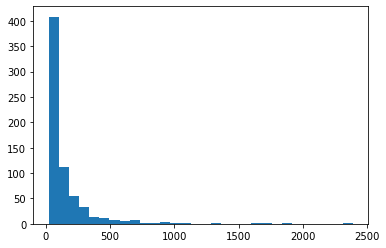

In [11]:
# create a histogram of all the interactions by all the users present in the dataset
interactions=movies.groupby('userId').count()['movieId']
plt.hist(interactions,bins=30)
plt.show()

In [12]:
interactions

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64

In [13]:
movies

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [14]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 

interactions_matrix=movies.pivot(index='userId',columns='movieId',values='rating')

In [15]:
# check the shape of the matrix

interactions_matrix.shape

(671, 9066)

In [16]:
# check head of the matrix and see how it looks like
interactions_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# replace all the missing values with zero

interactions_matrix=interactions_matrix.fillna(0)

In [18]:
interactions_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 1 to 671
Columns: 9066 entries, 1 to 163949
dtypes: float64(9066)
memory usage: 46.4 MB


In [19]:
# import cosine_similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity
def similar_users(user_id, interactions_matrix):
    
    # compute similarity of each user to the provided user
    similarity=[] 
    for user in range(1,interactions_matrix.shape[0]+1):
        sim= cosine_similarity([interactions_matrix.loc[user_id]],[interactions_matrix.loc[user]])
        similarity.append((user,sim))
    
    # sort by similarity
    
    similarity.sort(key=lambda x:x[1],reverse=True)
    # create list of just the user ids
    most_similar_users =[tup[0] for tup in similarity]
    
    # create list of similarity score
    
    similarity_score=[tup[1] for tup in similarity]
    # remove the user's own id
    most_similar_users.remove(user_id)
    
    # remove the user's own similarity score
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [20]:
len(similar_users(564,interactions_matrix)[0])

670

In [21]:
interactions_matrix.shape

(671, 9066)

In [22]:
# check the implemented function above
similar_users(564,interactions_matrix)[0][:5]


[306, 102, 518, 232, 119]

In [23]:
similar_users(564,interactions_matrix)[1][:5]

[array([[0.4752071]]),
 array([[0.45945837]]),
 array([[0.45806577]]),
 array([[0.42648819]]),
 array([[0.42188474]])]

In [24]:
import numpy as np

In [25]:
def recommendations(user_id, num_of_movies, user_item_interactions):
    # find the most similar users to the user_id for which we want to recommend movies
    most_similar_users = similar_users(user_id, user_item_interactions)[0]
    # find out those movies which this user has already interacted with
    movie_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id]>0)]))
    # create an empty list to store the recommended movies
    recommendations = []
    
    # copy those movies which are already interacted by user_id
    already_interacted = movie_ids.copy()
    # loop through each similar user from the list of most_similar_users
    for similar_user in most_similar_users:
        # implement the below code till the length of recommended movies does not become equal to num_of_movies
        if len(recommendations) < num_of_movies:
            # store all the movies interacted by each similar user to user_id
            similar_user_movie_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user]>0)]))
            # add those movies in the recommended list which are present in similar_user_movie_ids but not present in already_interacted
            recommendations.extend(list(similar_user_movie_ids.difference(already_interacted))) 
            # now add all those movies into already_interacted which we already added in recommendations
            already_interacted = already_interacted.union(similar_user_movie_ids)
        else:
            break
                
    
    return recommendations[:num_of_movies]

In [26]:
# check the implemented function above

recommendations(564,5,interactions_matrix)

[1537, 515, 1027, 2565, 524]

Let's recommend three movies to a new user which do not have interactions history in the dataset?

In [27]:
# recommend top three movies to the new user

movies['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
         ... 
48520       1
111913      1
1311        1
27922       1
2049        1
Name: movieId, Length: 9066, dtype: int64